# MARVEL HERO'S ID SEARCH BY NAME

用英雄名字的关键字搜索英雄的id并使用id查询英雄的相关events。

本程序使用了本地的图片缓存，需要先运行```marvel_get_img.ipynb```生成图片缓存目录```mg```
 

In [30]:
from imp import reload #用于重新加载模块的库
import marvel #这是一个用来专门生成marvel apikey的自定义模块
import requests
from IPython.display import Image
#import time
from hashlib import md5
import json
import os
import re
from pprint import pprint
#from IPython.display import Image
#reload(marvelkey) #调试模块时需要重新加载模块

marvel.pbkey = 'b429b36ad9c859671f28487a8acdca22'
marvel.pvkey = '10486b67a96262c7c4859f963ae11c36d94352e6'


Search for : 3-d


1011334 3-D Man


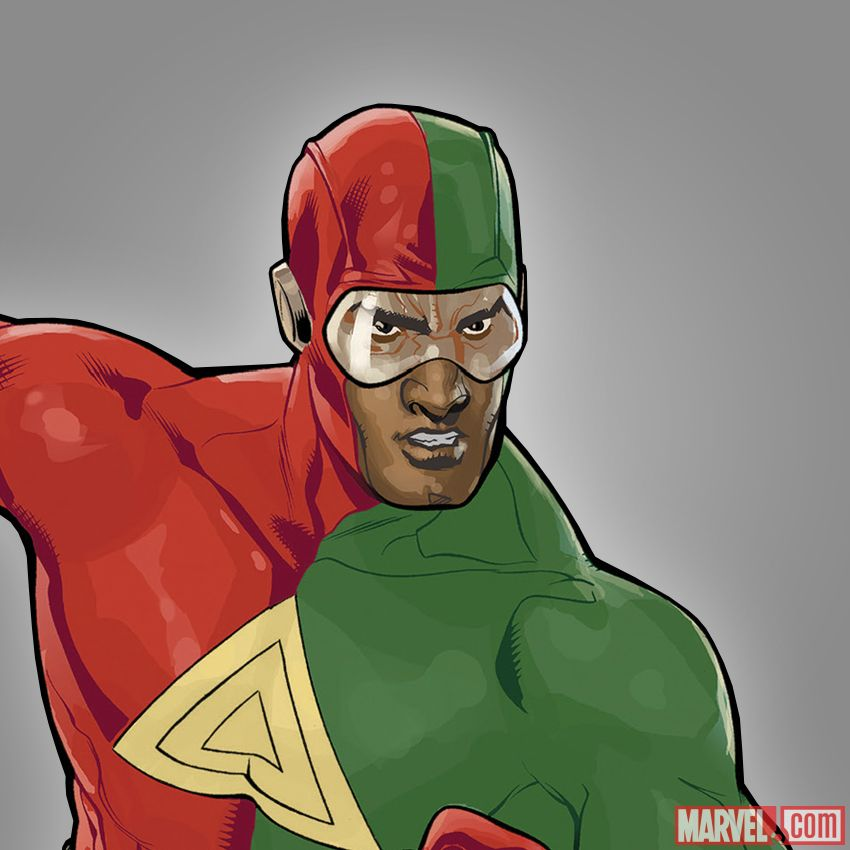

In [31]:
hero_name = input('Search for :')
search_result = False
with open('hero_dict_n.txt','r') as hero_dict:
    
    hero_dict_j = json.loads(hero_dict.read())
    
    for keys in hero_dict_j['heros_list']:
        #不区分大小写，将re.IGNORECASE传递到search的标志参数
        if re.search(r'.*'+hero_name+'.*',keys['name'],re.IGNORECASE):   
            search_result = True
            print(keys['id'],keys['name'])
            img = keys['thumbnail']['path']+'.'+keys['thumbnail']['extension']
            img = re.findall(r'/mg/.*',img)[0]
            img = str(img)
            #print(img)
            display(Image('.'+img,width=150))
if not search_result:
    print('Oops,there is nothing here.')
   

Hero's ID: 1011334


https://gateway.marvel.com:443/v1/public/characters/1011334/events?offset=0&limit=100&ts=201812041459142307&apikey=b429b36ad9c859671f28487a8acdca22&hash=0091fb7df40a2c4232ebd6ec62810832
Searching for events......

Events found: 1
Events got: 1 



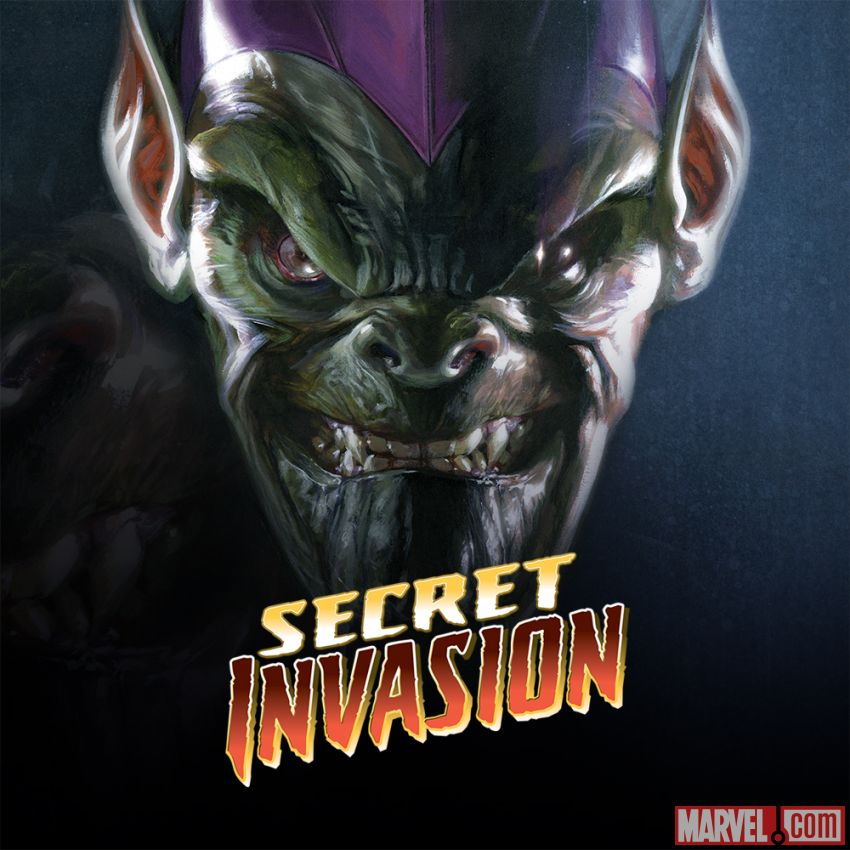

title: Secret Invasion 
 id: 269 
 Description: The shape-shifting Skrulls have been infiltrating the Earth for years, replacing many of Marvel's heroes with impostors, setting the stage for an all-out invasion. 
----------------


In [33]:
limit = '100'
offset = 0
hero_id =  input("Hero's ID:")
# count = 1


md5key,ts = marvel.hashkey()
url =  "https://gateway.marvel.com:443/v1/public/characters/"\
       +hero_id+"/events?offset="+str(offset)+"&limit="+limit+"&ts="+ts+"&apikey="\
       +marvel.pbkey+"&hash="+md5key
print(url)
print('Searching for events......\n')

hero_events = requests.get(url)
hero_events_j = json.loads(hero_events.text)

print('Events found:',hero_events_j['data']['total'])
print('Events got:',hero_events_j['data']['count'],'\n')

for events in hero_events_j['data']['results']:
    
    display(Image(events['thumbnail']['path']+'.'+events['thumbnail']['extension']))
    print('title:',events['title'],'\n','id:',events['id'],'\n',\
          'Description:',events['description'],'\n----------------')
    